Alan Andree Rodríguez Levario - 222791133

# Hands-on 3 Kmeans

## 1.1 Fundamentos de la Técnica

K-Means es uno de los algoritmos más populares de aprendizaje no supervisado.

Su objetivo es la clusterización: agrupar un conjunto de datos en $k$ grupos (clusters) distintos y no superpuestos.

La lógica principal es:

1. El algoritmo define $k$ puntos en el espacio, llamados centroides (uno por cada cluster).

2. Cada punto de dato es asignado al cluster cuyo centroide esté más cerca (usando una métrica de distancia, usualmente la euclidiana).

3. Después de que todos los puntos son asignados, el algoritmo recalcula la posición de los $k$ centroides, moviéndolos al "centro" (la media) de todos los puntos asignados a su cluster.

4. Los pasos 2 y 3 se repiten iterativamente hasta que los centroides ya no se mueven significativamente, lo que significa que los clusters se han estabilizado.

Es un algoritmo rápido y eficiente, muy usado para segmentación de clientes, compresión de imágenes y detección de anomalías.

## 1.2 Modelo Matemático

El objetivo de K-Means es encontrar los centroides ($c$) que minimizan la Inercia, también conocida como la Suma de Cuadrados Intra-Cluster (WCSS - Within-Cluster Sum of Squares).

Esta es la suma de las distancias al cuadrado desde cada punto de dato ($x_i$) hasta el centroide de su cluster asignado ($c_j$).

Fórmula (LaTeX):$$J = \sum_{j=1}^{k} \sum_{i=1}^{n} ||x_i^{(j)} - c_j||^2
$$Donde:

* $k$ es el número de clusters.
* $n$ es el número de puntos de datos.
* $c_j$ es el centroide del cluster $j$.
* $x_i^{(j)}$ es el punto de dato $i$ que ha sido asignado al cluster $j$.
* $|| ... ||^2$ representa la **distancia Euclidiana al cuadrado**.

**El Algoritmo (simplificado):**

1.  **Inicialización:** Escoger $k$ centroides iniciales (comúnmente usando el método 'k-means++').
2.  **Paso de Asignación:** Asignar cada punto $x_i$ al cluster $j$ cuyo centroide $c_j$ esté más cercano.$$$$\\text{cluster}(x\_i) = \\arg \\min\_{j \\in {1, \\dots, k}} ||x\_i - c\_j||^2
$$
$$

3. Paso de Actualización: Recalcular cada centroide $c_j$ como la media de todos los puntos $x_i$ asignados a ese cluster en el paso anterior.$$ \\ c\_j = \frac{1}{|S\_j|} \sum\_{x\_i \in S\_j} x\_i$$$$$$(Donde $S_j$ es el conjunto de puntos asignados al cluster $j$).

4. Convergencia: Repetir los pasos 2 y 3 hasta que los centroides dejen de cambiar o se alcance un número máximo de iteraciones.

## 1.3 Descripción de la Librería

* Librería: sklearn.cluster

  * Clase: KMeans

  * Descripción: Esta es la clase principal que implementa el algoritmo K-Means.

  * Parámetros clave:

    * n_clusters: El número de clusters a formar (el valor de $k$).

    * init: El método de inicialización de centroides. Por defecto es 'k-means++', que es una inicialización inteligente que acelera la convergencia.

    * n_init: El número de veces que el algoritmo se ejecutará con diferentes centroides iniciales (se queda con el mejor resultado).

    * random_state: Para asegurar la reproducibilidad de los resultados.

* Librería: sklearn.preprocessing

  * Clase: StandardScaler

  * Descripción: Crítico para K-Means. Dado que K-Means se basa en distancias, si las características tienen diferentes escalas (ej. una va de 0 a 1 y otra de 0 a 1000), la de escala mayor dominará. El escalado (estandarización) es un paso de preprocesamiento casi obligatorio.

* Librería: sklearn.metrics

  * Función: accuracy_score y confusion_matrix.

  * Descripción: Métricas de clasificación supervisada. Las usaremos después de haber mapeado las etiquetas de cluster no supervisadas a las etiquetas reales del dataset Iris.

* Librería: scipy.stats

  * Función: mode

  * Descripción: La usaremos para encontrar la "moda" (el valor más frecuente) y así poder mapear los clusters (ej. 'cluster 0') a las etiquetas reales (ej. 'setosa').

* Otras: pandas (para .describe()), seaborn (para pairplot) y matplotlib.pyplot (para heatmap).

## 1.4 Pipeline de Implementación

In [1]:
# Celda de importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode

In [2]:
# Carga de datos
iris = load_iris()
X = iris.data

# Guardamos 'y' (las etiquetas verdaderas) K-Means no usará 'y' para entrenar.
y_true = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

### 1.4.1 Preprocesamiento

**Análisis Estadístico**

In [3]:
# Crear un DataFrame para análisis
df = pd.DataFrame(X, columns=feature_names)
df['species_id'] = y_true
df['species_name'] = [target_names[i] for i in y_true]

**Gráfico de Dispersión (Scatter Plot)**

Este gráfico es clave en K-Means, ya que nos permite visualizar los clusters que esperamos encontrar.

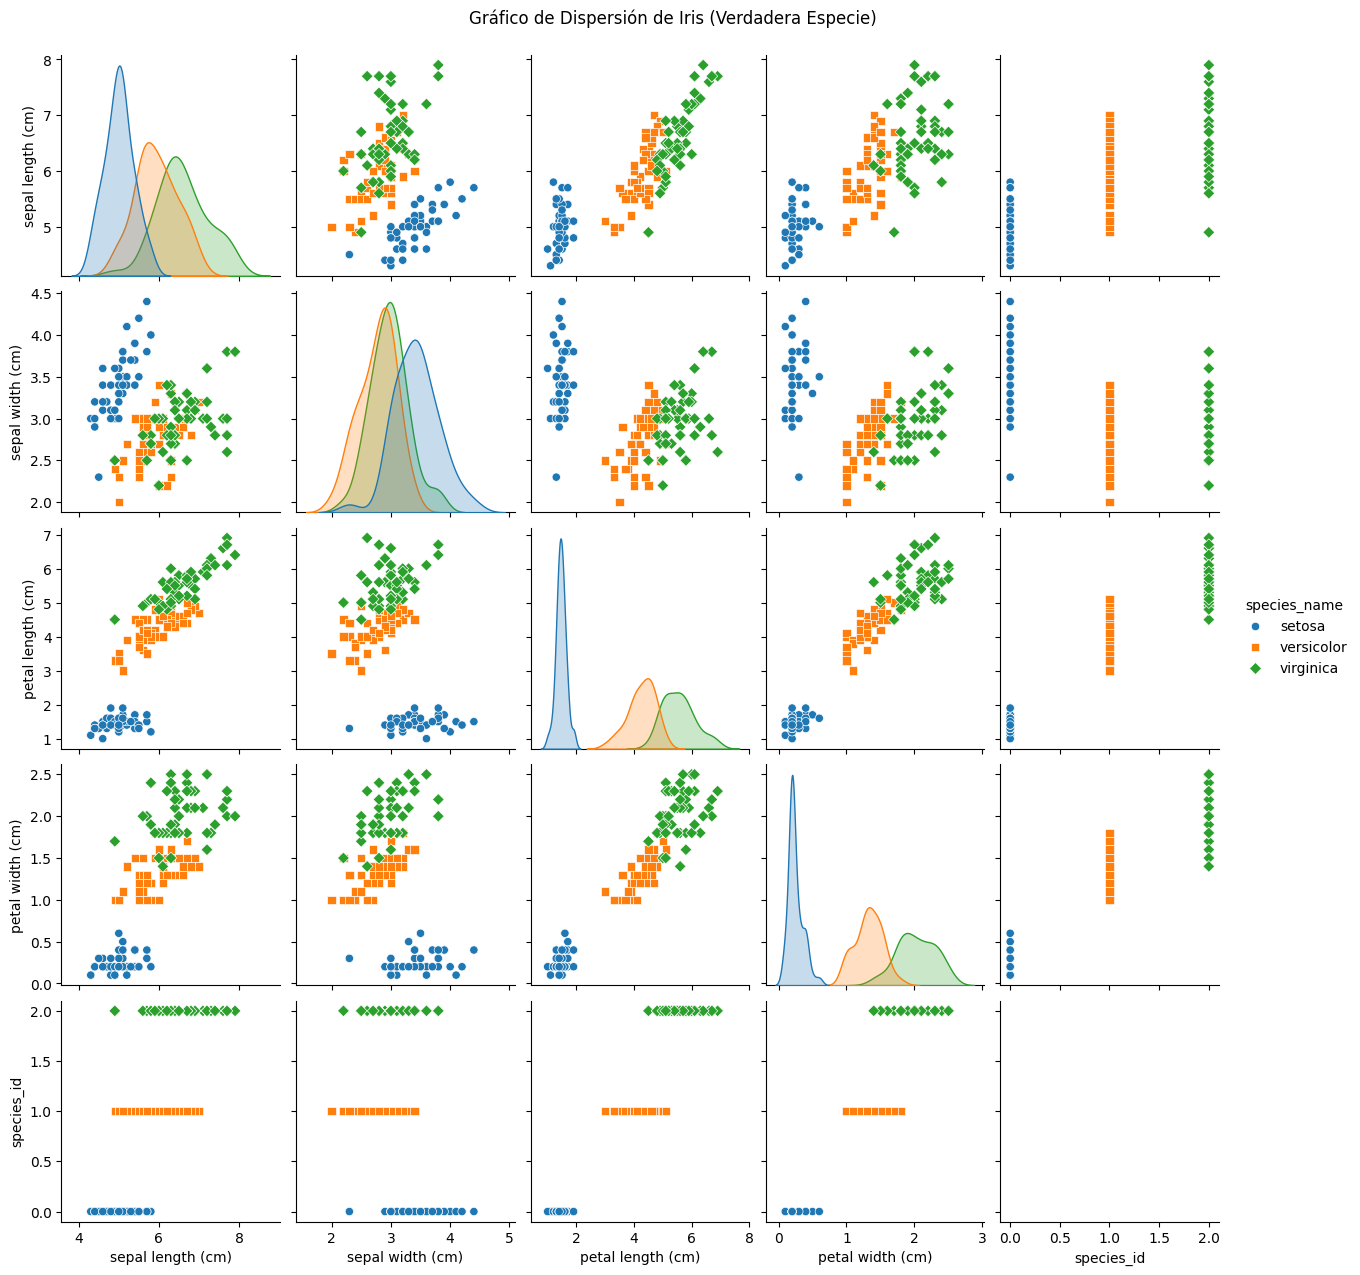

In [4]:
# Gráfico de Dispersión (Pair Plot)
sns.pairplot(df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle("Gráfico de Dispersión de Iris (Verdadera Especie)", y=1.02)
plt.show()

**Escalado de Características**

K-Means es sensible a la escala, por lo que estandarizamos X.

In [5]:
# K-Means es un algoritmo basado en distancia, el escalado es crucial.
scaler = StandardScaler()

# Ajustamos (fit) y transformamos todos los datos X
# (No hay split train/test en clustering, usamos todos los datos)
X_scaled = scaler.fit_transform(X)

**Entrenamiento del Modelo K-Means**

Ahora aplicamos K-Means a los datos escalados. Sabemos que hay 3 especies, así que elegimos k=3.

In [6]:
# 1. Instanciar el modelo

k = 3 # k=3 porque sabemos que el dataset Iris tiene 3 especies
kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=42)

# 2. Entrenar (ajustar) el modelo a los datos escalados
kmeans_model.fit(X_scaled)

# 3. Obtener las etiquetas de cluster que K-Means asignó
# Estos son los "clusters" (0, 1, 2)
cluster_labels = kmeans_model.labels_

**Explicación del Mapeo**

Las etiquetas de K-Means (ej. [1, 1, 1, 1]) no coinciden directamente con las etiquetas reales ([0, 0, 0, 0]). K-Means llamó 'cluster 1' a lo que nosotros llamamos 'clase 0'.

Debemos crear un mapa para corregir esto antes de evaluar.

In [7]:
# Mapeo de clusters (0, 1, 2) a las etiquetas reales (0, 1, 2)
# Usaremos scipy.stats.mode

cluster_map = {}
for i in range(k):
    # 1. Encontrar todos los puntos asignados al cluster 'i'
    mask = (cluster_labels == i)

    # 2. Encontrar la etiqueta real (y_true) más frecuente en ese cluster
    # mode(y_true[mask]) nos da la moda (valor más común)
    true_label_mode = mode(y_true[mask])[0]

    # 3. Guardar el mapa: Cluster 'i' -> Etiqueta Real 'true_label_mode'
    cluster_map[i] = true_label_mode

# Crear el array de predicciones (y_pred) usando el mapa
# Esto traduce las etiquetas de K-Means a etiquetas comparables
y_pred = [cluster_map[label] for label in cluster_labels]

### 1.4.2 Prediction
Ahora creamos la función que recibe un patrón, lo escala, predice su cluster y luego usa el mapa para darnos la clase (especie) predecida.

In [8]:
def predecir_especie(patron):

    # Recibe un patrón de 4 características [l_sep, a_sep, l_pet, a_pet], lo escala y predice la especie de Iris usando el modelo K-Means.
    # 1. Convertir a array 2D y escalar
    patron_np = np.array(patron).reshape(1, -1)
    patron_scaled = scaler.transform(patron_np)

    # 2. Predecir el cluster
    cluster_pred_id = kmeans_model.predict(patron_scaled)[0]

    # 3. Mapear el cluster a la etiqueta real (ej. 0='setosa')
    label_pred_id = cluster_map[cluster_pred_id]

    # 4. Obtener el nombre de la especie
    nombre_especie = target_names[label_pred_id]

    print(f"Patrón de entrada: {patron}")
    print(f"Cluster K-Means: {cluster_pred_id}")
    print(f"Clase predecida: '{nombre_especie}' (Etiqueta ID: {label_pred_id})")
    return nombre_especie

# Prueba de la función
# Ejemplo 1: Un patrón de 'setosa' (pétalos pequeños)
patron_setosa = [5.1, 3.5, 1.4, 0.2]
print("--- Predicción 1 ---")
predecir_especie(patron_setosa)

# Ejemplo 2: Un patrón de 'virginica' (pétalos grandes)
patron_virginica = [6.7, 3.0, 5.2, 2.3]
print("\n--- Predicción 2 ---")
predecir_especie(patron_virginica)

--- Predicción 1 ---
Patrón de entrada: [5.1, 3.5, 1.4, 0.2]
Cluster K-Means: 1
Clase predecida: 'setosa' (Etiqueta ID: 0)

--- Predicción 2 ---
Patrón de entrada: [6.7, 3.0, 5.2, 2.3]
Cluster K-Means: 2
Clase predecida: 'virginica' (Etiqueta ID: 2)


np.str_('virginica')

### 1.4.3 Model Evaluation
Ahora que tenemos las etiquetas verdaderas (y_true) y las predicciones mapeadas (y_pred), podemos usar las métricas supervisadas.

In [9]:
# Calcular Accuracy
accuracy = accuracy_score(y_true, y_pred)

print(f"--- Métrica: Accuracy ---")
print(f"Accuracy (Exactitud): {accuracy * 100:.2f}%")

--- Métrica: Accuracy ---
Accuracy (Exactitud): 83.33%


Métrica: Matriz de Confusión
Matriz (array de NumPy):
[[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]


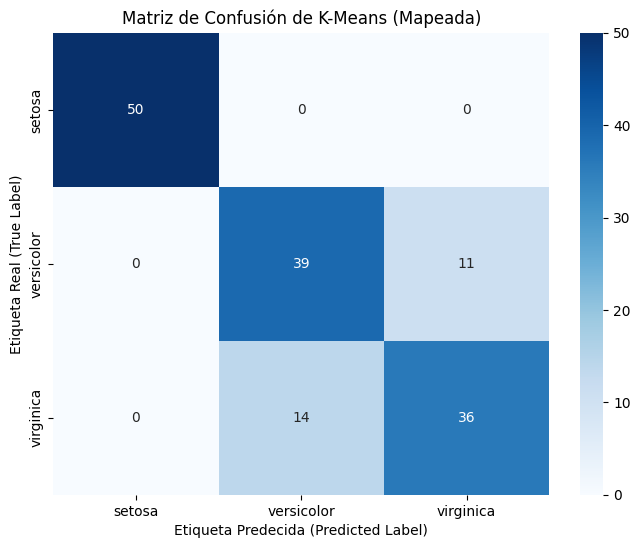

In [10]:
# Calcular Matriz de Confusión
cm = confusion_matrix(y_true, y_pred)

print("Métrica: Matriz de Confusión")
print("Matriz (array de NumPy):")
print(cm)

# Graficar la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.ylabel('Etiqueta Real (True Label)')
plt.xlabel('Etiqueta Predecida (Predicted Label)')
plt.title('Matriz de Confusión de K-Means (Mapeada)')
plt.show()

## Referencias Bibliográficas

Documentación oficial de Scikit-learn sobre sklearn.cluster.KMeans. (Consultado en https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)